In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
from afinn import Afinn
nltk.download('movie_reviews')
nltk.download('vader_lexicon')
# 读取Parquet文件
df = pd.read_parquet('data/sample_data.parquet')
df

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Post Title,Post Time,Comment Body,Score
0,Ai bubble,2024-02-27,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,1
1,Ai bubble,2024-02-27,I believe this will be the first 24 trillion m...,2298
2,Ai bubble,2024-02-27,"I'm sure there's a bubble in there, especially...",949
3,Ai bubble,2024-02-27,"Phew thank god I saw Cathies, almost had me wo...",295
4,Ai bubble,2024-02-27,Number one rule of Wall Street: Nobody - I don...,283
...,...,...,...,...
4492,Ai is not overrated,2023-07-29,It is nearly 8 months into 2023 and you just g...,1
4493,Ai is not overrated,2023-07-29,"Ok, chatGPT,",1
4494,Ai is not overrated,2023-07-29,FVRR is seen as an AI loser at this point. Co...,1
4495,Ai is not overrated,2023-07-29,AI is overrated and overfunded. AI will be ear...,1


In [3]:
#TextBlog
from textblob import TextBlob
s = TextBlob('I\'m sure there\'s a bubble in there, especially right now with NVDA. But much like with the dot.com long term there will be a couple kings that will come out of it and significantly shape the direction of our technological advancement.').sentiment
'''
It ranges from minus one (very negative) to one (very positive). It can also calculate the subjectivity score, which
captures how subjective the string is. This score ranges from zero (very objective) to one (very subjective)
'''
print(s.polarity) # How positive the text is.
print(s.subjectivity) # How subjective the text is.

0.3192857142857143
0.6727777777777778


In [4]:
from textblob.sentiments import NaiveBayesAnalyzer
#Use machine learning (a Naive Bayes analyzer from NLTK) that is trained on a dataset of movie reviews.
b = \
TextBlob(
'I love NLP.',
analyzer=NaiveBayesAnalyzer())
b.sentiment

Sentiment(classification='pos', p_pos=0.5441400304414004, p_neg=0.45585996955859964)

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#It's very good at analyzing sentiment on social media.
#Compound ranges from -1~1, from negative to positive.
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('I love NLP.')

D:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [6]:
a = Afinn() # Instantiate the 'Afinn'class.
#Score ranges from -5~5(negative to positive)
a.score('I love NLP.')

3.0

In [7]:
result1=[]
result2=[]
result3=[]
result4=[]
model=NaiveBayesAnalyzer()
for comment in df['Comment Body']:
    result1.append((comment,TextBlob(comment).sentiment.polarity))
    s=sid.polarity_scores(comment)
    result3.append((comment,s['pos'],s['neg'],s['neu'],s['compound']))
    b=TextBlob(comment,analyzer=model).sentiment
    result2.append((comment,b.p_pos,b.p_neg,b.classification))
    result4.append((comment,a.score(comment)))
result1=pd.DataFrame(result1,columns=['Comment Body','pos'])
result2=pd.DataFrame(result2,columns=['Comment Body','p_pos','p_neg','classification'])
result3=pd.DataFrame(result3,columns=['Comment Body','pos','neg','neu','compound'])
result4=pd.DataFrame(result4,columns=['Comment Body','pos'])

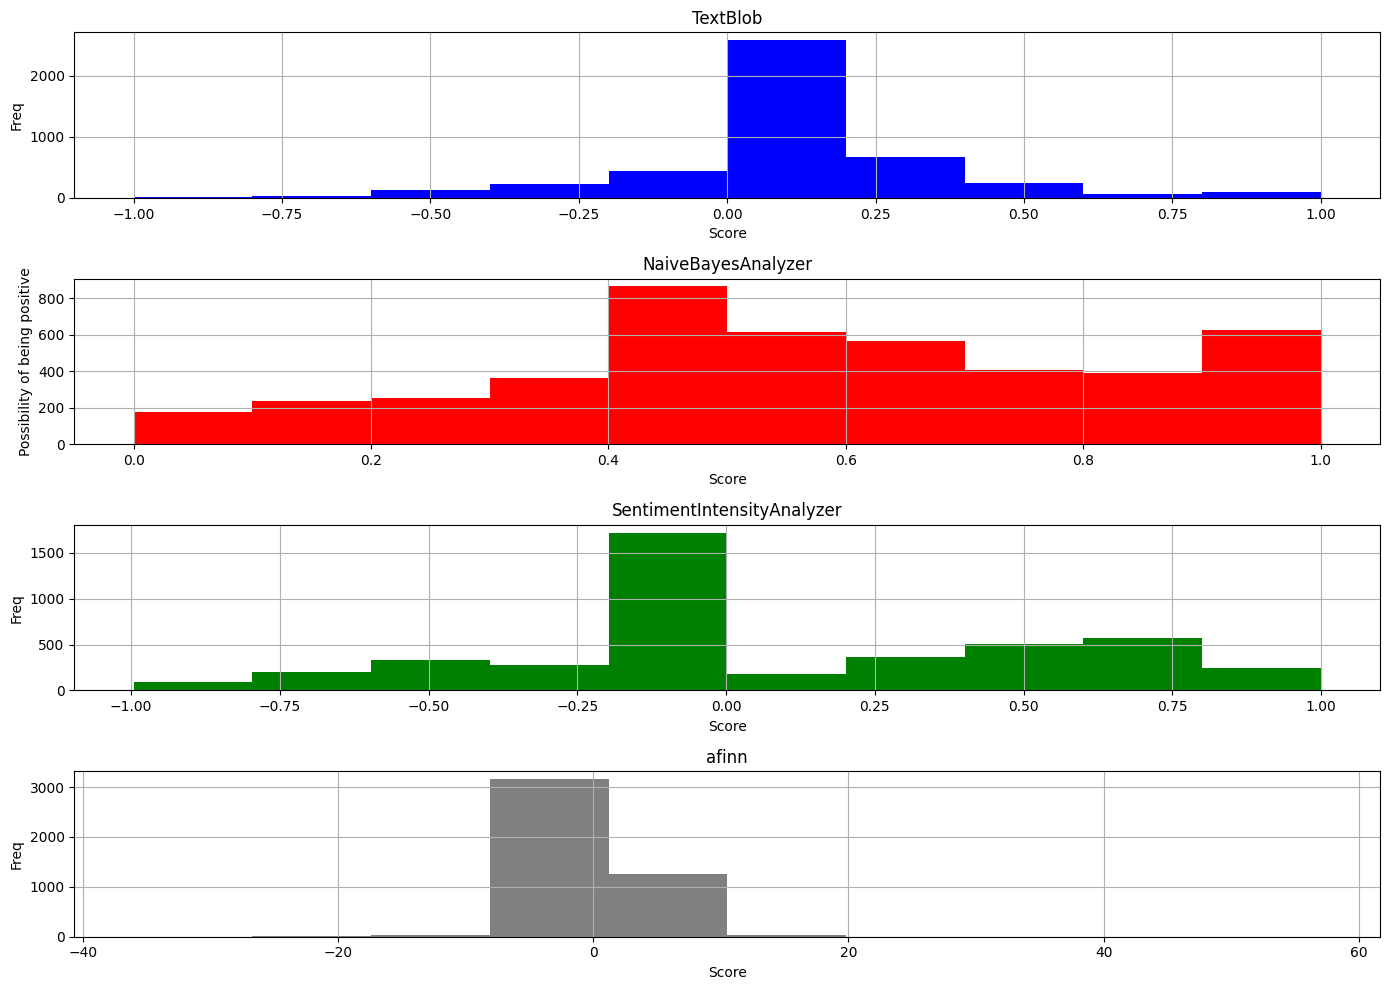

In [8]:
result1_pos = result1['pos']
result2_pos=result2['p_pos']
result3_compound = result3['compound']
result4_pos=result4['pos']
fig, ax = plt.subplots(4, 1, figsize=(14, 10))

# plot results using TextBlob
result1_pos.hist(ax=ax[0], color='blue')
ax[0].set_title('TextBlob')
ax[0].set_ylabel('Freq')
ax[0].set_xlabel('Score')


# plot results using SentimentIntensityAnalyzer
result2_pos.hist(ax=ax[1], color='red')
ax[1].set_title('NaiveBayesAnalyzer')
ax[1].set_ylabel('Possibility of being positive')
ax[1].set_xlabel('Score')


# plot results using SentimentIntensityAnalyzer
result3_compound.hist(ax=ax[2], color='green')
ax[2].set_title('SentimentIntensityAnalyzer')
ax[2].set_ylabel('Freq')
ax[2].set_xlabel('Score')

# plot results using SentimentIntensityAnalyzer
result4_pos.hist(ax=ax[3], color='grey')
ax[3].set_title('afinn')
ax[3].set_ylabel('Freq')
ax[3].set_xlabel('Score')

plt.tight_layout()
plt.show()